# **Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

# **Shobit Halse | T083**

# **Aim :** Logistic Regression and Decision Tree
# • Build a logistic regression model to predict a binary outcome.
# • Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
# • Construct a decision tree model and interpret the decision rules for classification.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Apple-Quality.csv')

In [22]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [23]:
df = df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Quality']]

In [24]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [25]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df = df.dropna()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df['Quality'] = le.fit_transform(df.Quality)

In [31]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [32]:
feature_cols = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
X = df[feature_cols]
y = df.Quality
print(X)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
0    -0.491590  
1    -0.722809  
2     2.621636  
3     0.790723  
4     0.501984  
...        ...  
3995

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Predicted Test Results : ",y_pred)
print("~"*20)

Predicted Test Results :  [0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1

In [35]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[360, 146],
       [127, 367]])

Text(0.5, 427.9555555555555, 'Predicted label')

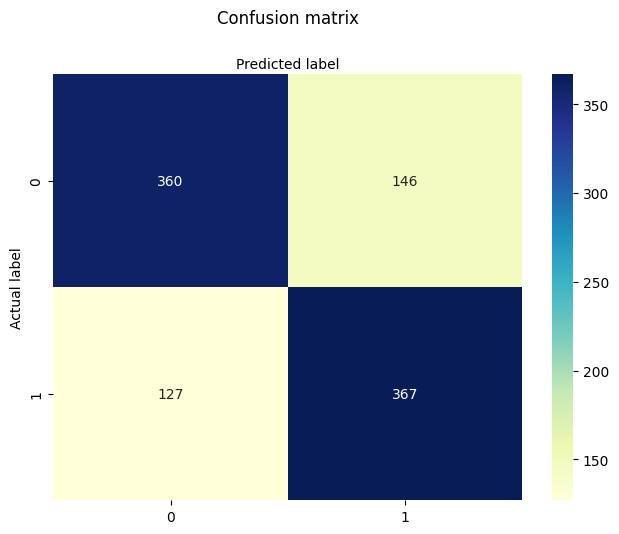

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.727
Precision: 0.7153996101364523
Recall: 0.742914979757085


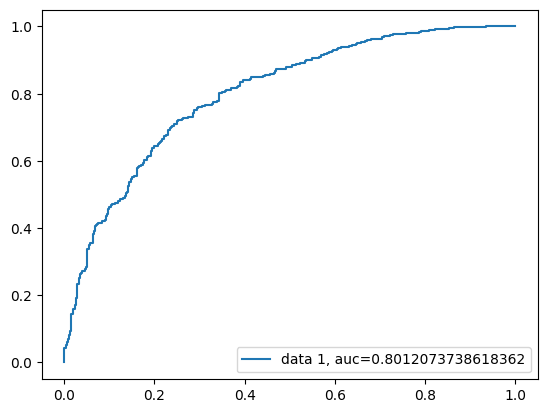

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()